In [1]:
import pandas as pd

df = pd.read_csv(r"D:\KULIAH\Tugas Akhir\Program\Program FIX\preprocessingIG.csv")

In [3]:
x = df.values[:, :-1]
y = df.values[:, -1]

In [4]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [7]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

rf_model = RandomForestClassifier(n_estimators=100, max_depth=10, max_features='sqrt', bootstrap=True, random_state=42)
rf_model.fit(X_train, y_train)

RandomForestClassifier(max_depth=10, random_state=42)

In [8]:
y_predrf = rf_model.predict(X_test)
print(classification_report(y_test, y_predrf))
accuracyrf = accuracy_score(y_test, y_predrf)
print(f'Accuracy: {accuracyrf}')

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00       697
         1.0       1.00      1.00      1.00       645

    accuracy                           1.00      1342
   macro avg       1.00      1.00      1.00      1342
weighted avg       1.00      1.00      1.00      1342

Accuracy: 0.9985096870342772


In [9]:
from sklearn.metrics import accuracy_score, precision_score, f1_score, recall_score

# Evaluate model
accuracy = accuracy_score(y_test, y_predrf)
precision = precision_score(y_test, y_predrf, average='weighted')
f1 = f1_score(y_test, y_predrf, average='weighted')
recall = recall_score(y_test, y_predrf, average='weighted')

print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"F1 Score: {f1:.2f}")
print(f"Recall: {recall:.2f}")

Accuracy: 1.00
Precision: 1.00
F1 Score: 1.00
Recall: 1.00


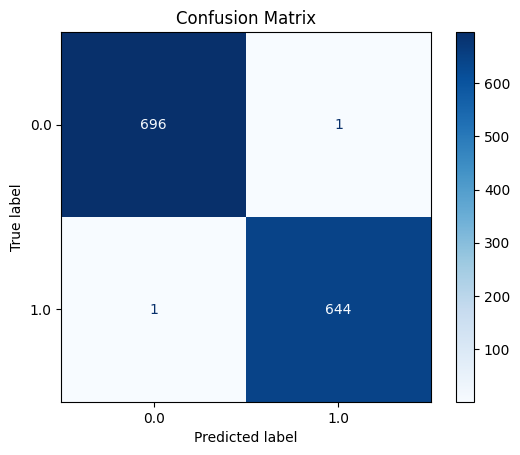

In [10]:
# Calculate confusion matrix
conf_matrix = confusion_matrix(y_test, y_predrf)

# Display confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=rf_model.classes_)
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix")
plt.show()